In [1]:
cd ../src

c:\Users\jeong\Desktop\action-recognition-practice\src


In [120]:
from models.yolo import *
from models.yolo.datasets import letterbox
from models.yolo.utils import scale_coords, non_max_suppression, plot_one_box
import torch
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from time import time
import processing.nia2019v1 as nia
import cv2

In [3]:
resolution_str = "768x480"
resolution = np.array(resolution_str.split('x')).astype('int')

stream = ffmpeg.input("../test.mp4")
stream = stream.filter('fps', fps=3, round='up')
stream = stream.filter('scale', size=resolution_str)
stream = stream.output('pipe:', format='rawvideo', pix_fmt='rgb24')
frames, _ = stream.run(capture_stdout=True)
frames = (
    np
    .frombuffer(frames, np.uint8)
    .reshape([-1, resolution[1], resolution[0], 3])
)
frames.shape

(953, 480, 768, 3)

In [5]:
model = Darknet("./models/yolo/cfg/yolov3.cfg", 512)
model.eval()
model.load_state_dict(torch.load("./models/yolo/yolov3.pt")['model'])

Model Summary: 222 layers, 6.19491e+07 parameters, 6.19491e+07 gradients


<All keys matched successfully>

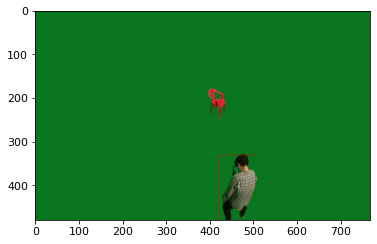

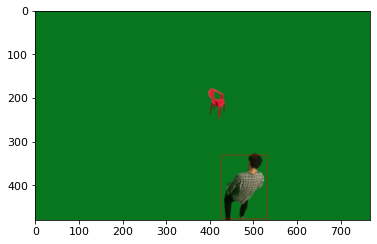

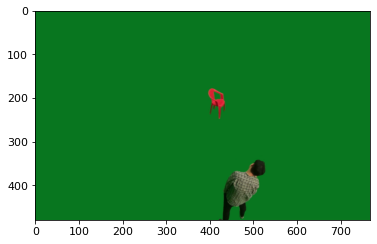

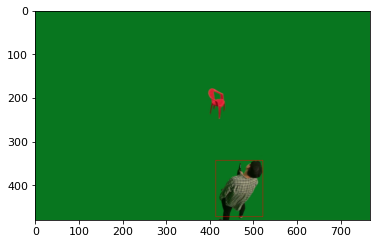

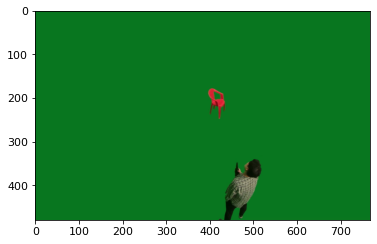

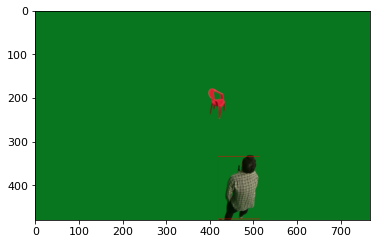

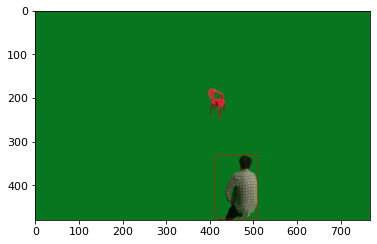

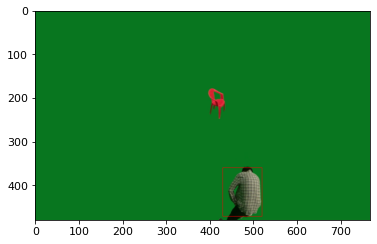

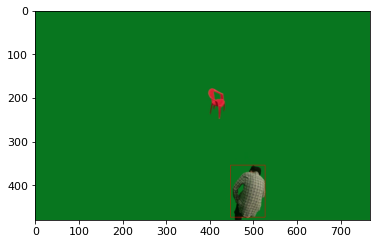

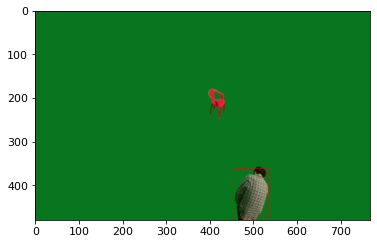

In [135]:
for f in frames[50:50+10,...]:
    f = f.copy()
    f_ = letterbox(f.copy(), 512)[0].transpose(2, 0, 1)[np.newaxis,...]
    f_ = torch.from_numpy(f_).float() / 255.
    
    # prediction & nms
    pred = model(f_)[0]
    pred = non_max_suppression(pred, 0.3, 0.6, multi_label=False, classes=None, agnostic=None)
    for i, det in enumerate(pred):
        if det == None or len(det) == 0:
            continue
        gn = torch.tensor(f.shape)[[1, 0, 1, 0]]
        det[:, :4] = scale_coords(f_.shape[2:], det[:, :4], f.shape).round()
        for *x, conf, c in det:
            if c != 0:
                break
            c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
            cv2.rectangle(f, c1, c2, [255,0,0])
    plt.imshow(f)
    plt.show()

In [128]:
frames.shape

(953, 480, 768, 3)